<h1>DRV Analysis</h1>

In [1]:
from properties import rit_models, l_ax_standard, w_ax_step_param_standard, save_w_ax_standard, l_pmos_q_standard, w_pmos_q_standard, l_nmos_q_standard, w_nmos_q_standard, l_pmos_q_neg_standard, w_pmos_q_neg_standard, l_nmos_q_neg_standard, w_nmos_q_neg_standard, dc_vsweep_standard, vdd_standard, vsweep_standard
from properties import l_ax_seevinck, w_ax_step_param_seevinck, save_w_ax_seevinck, l_pmos_q_seevinck, w_pmos_q_seevinck, l_nmos_q_seevinck, w_nmos_q_seevinck, l_pmos_q_neg_seevinck, w_pmos_q_neg_seevinck, l_nmos_q_neg_seevinck, w_nmos_q_neg_seevinck, dc_vsweep_seevinck, vdd_seevinck, vsweep_seevinck, e1, e2, e3, e4, e5, e6, e7, e8
from utils.path import ltspice, schematics, images, data
from utils.check import check_output_image
from utils.patterns import w_ax_snm_standard_pattern
from utils.conv import str2float
import re
from models.ops import load_asc, load_ltr
from PyLTSpice import SimRunner
import matplotlib.pyplot as plt
import os

<h2>SNM Standard Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/snm-standard/hold/snm_standard_hold.asc


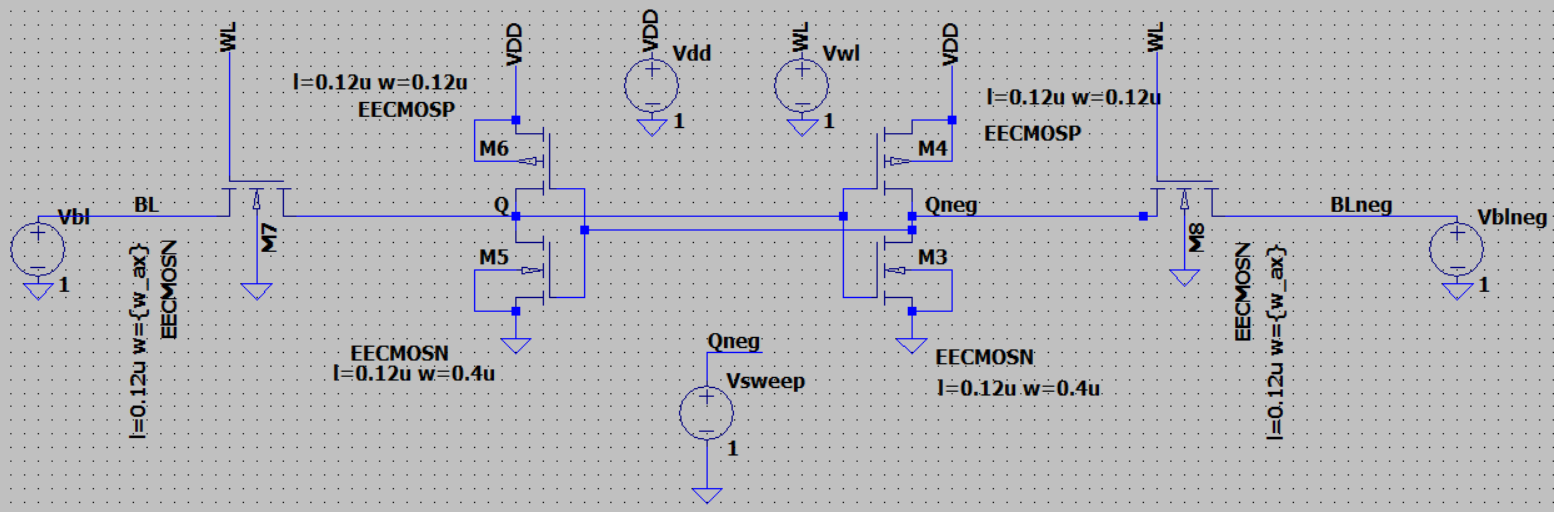

Successful/Total Simulations: 0/1
Raw file: data\snm-standard\hold\snm_standard_hold_1.raw, Log file: data\snm-standard\hold\snm_standard_hold_1.log
File opened successfully: data\snm-standard\hold\snm_standard_hold_1.raw
File updated successfully: ../../images/snm_standard_hold_simulation.png


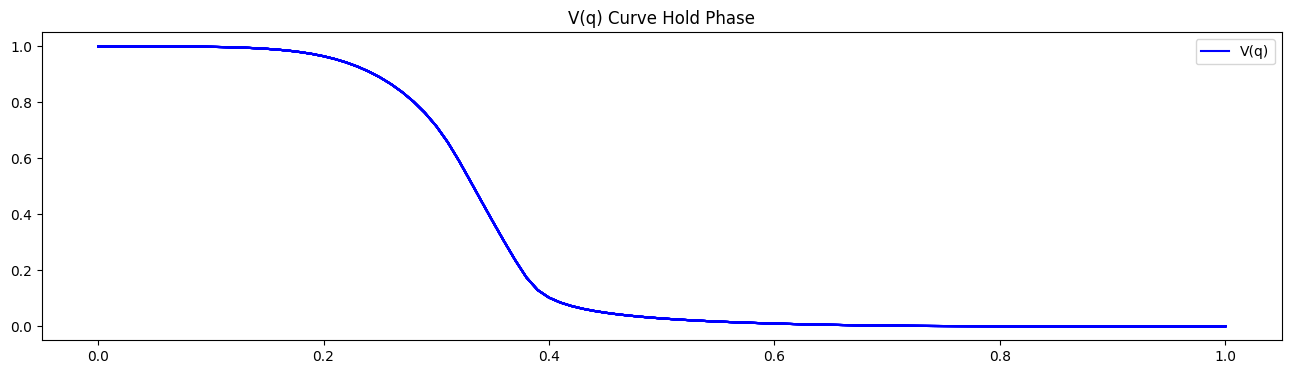

In [2]:
snm_standard_hold_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "snm-standard/hold/snm_standard_hold.asc"),
                                schematic_image_path=os.path.join(schematics, "snm_standard.png")
                                )
vwl='0'; vbl='1'; vblneg='1'
snm_standard_hold_netlist.set_parameter('l_ax', l_ax_standard)
snm_standard_hold_netlist.set_parameter('l_pmos_q', l_pmos_q_standard)
snm_standard_hold_netlist.set_parameter('w_pmos_q', w_pmos_q_standard)
snm_standard_hold_netlist.set_parameter('l_nmos_q', l_nmos_q_standard)
snm_standard_hold_netlist.set_parameter('w_nmos_q', w_nmos_q_standard)
snm_standard_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_standard)
snm_standard_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_standard)
snm_standard_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_standard)
snm_standard_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_standard)
snm_standard_hold_netlist.set_parameter('vdd', vdd_standard)
snm_standard_hold_netlist.set_parameter('vwl', vwl)
snm_standard_hold_netlist.set_parameter('vbl', vbl)
snm_standard_hold_netlist.set_parameter('vblneg', vblneg)
snm_standard_hold_netlist.set_parameter('vsweep', vsweep_standard)
snm_standard_hold_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_standard,
                                        w_ax_step_param_standard,
                                        save_w_ax_standard
                                    )
snm_standard_hold_runner = SimRunner(output_folder=f"{data}/snm-standard/hold/")
snm_standard_hold_runner.run(netlist=snm_standard_hold_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(snm_standard_hold_runner.okSim) + '/' + str(snm_standard_hold_runner.runno))

snm_standard_hold_raw = ""
snm_standard_hold_log = ""
for snm_standard_hold_raw, snm_standard_hold_log in snm_standard_hold_runner:
    print("Raw file: %s, Log file: %s" % (snm_standard_hold_raw, snm_standard_hold_log))

snm_standard_hold_ltr = load_ltr(raw_file_path=snm_standard_hold_raw)
v_q_snm_standard_hold = snm_standard_hold_ltr.get_trace("V(q)")
vsweep_snm_standard_hold = snm_standard_hold_ltr.get_trace('vsweep')
steps = snm_standard_hold_ltr.get_steps()

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_snm_standard_hold.get_wave(step), v_q_snm_standard_hold.get_wave(step), label=steps[step], color='blue')
plt.title("V(q) Curve Hold Phase")
plt.legend(["V(q)"])
snm_standard_hold_simulation_path_image = os.path.join(images, "snm_standard_hold_simulation.png")
check_output_image(snm_standard_hold_simulation_path_image)
plt.savefig(snm_standard_hold_simulation_path_image)
plt.show()

w_ax_snm_standard_hold = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]
File updated successfully: ../../images/w_ax_snm_standard_hold.png


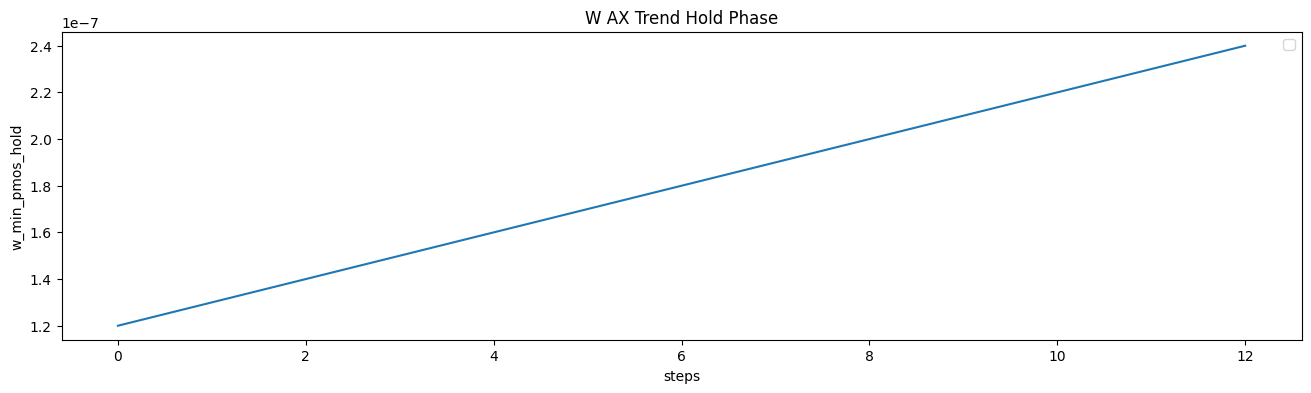

In [3]:
snm_standard_hold_log_file_path = f"./{snm_standard_hold_log}"

with open(snm_standard_hold_log_file_path, "r") as file:
    content = file.read()


w_ax_snm_standard_hold_data = re.search(w_ax_snm_standard_pattern, content, re.DOTALL).group(1)
w_ax_snm_standard_hold_lines = w_ax_snm_standard_hold_data.strip().split('\n')[1:]
w_ax_snm_standard_hold = [float(line.split('\t')[1]) for line in w_ax_snm_standard_hold_lines]

print(f'w_ax_snm_standard_hold = {w_ax_snm_standard_hold}')
plt.figure(figsize=(16, 4))
plt.legend(['w_ax_snm_standard_hold'])
plt.plot(w_ax_snm_standard_hold, label='w_ax_snm_standard_hold')
plt.ylabel('w_min_pmos_hold'); plt.xlabel('steps'); plt.title('W AX Trend Hold Phase')
w_ax_snm_standard_hold_path_image = os.path.join(images, "w_ax_snm_standard_hold.png")
check_output_image(w_ax_snm_standard_hold_path_image)
plt.savefig(w_ax_snm_standard_hold_path_image)
plt.show()

File updated successfully: ../../images/butterfly_curve_snm_standard_hold.png


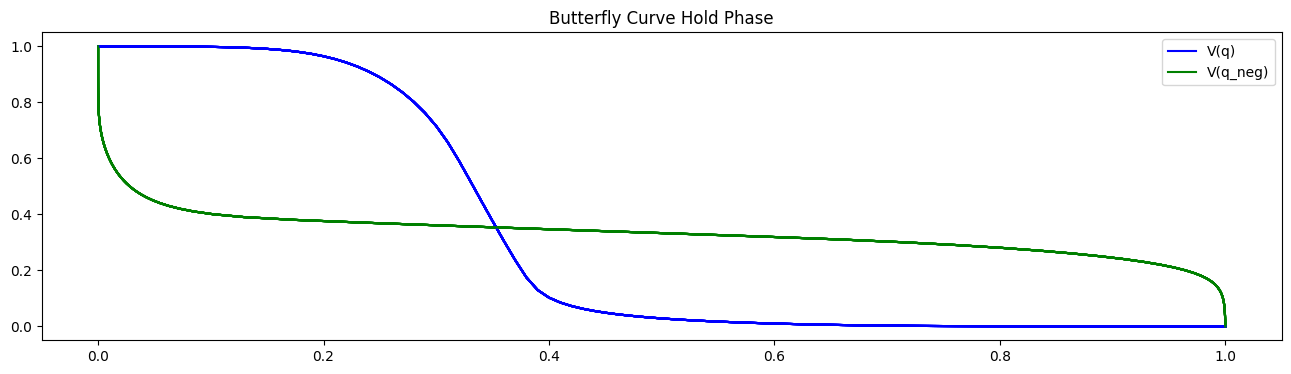

In [4]:
plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_snm_standard_hold.get_wave(step), v_q_snm_standard_hold.get_wave(step), label=steps[step], color='blue')
    plt.plot(v_q_snm_standard_hold.get_wave(step), vsweep_snm_standard_hold.get_wave(step), label=steps[step], color='green')
plt.title("Butterfly Curve Hold Phase")
plt.legend(["V(q)", "V(q_neg)"])
butterfly_curve_snm_standard_hold_path_image = os.path.join(images, "butterfly_curve_snm_standard_hold.png")
check_output_image(butterfly_curve_snm_standard_hold_path_image)
plt.savefig(butterfly_curve_snm_standard_hold_path_image)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/snm-standard/read/snm_standard_read.asc


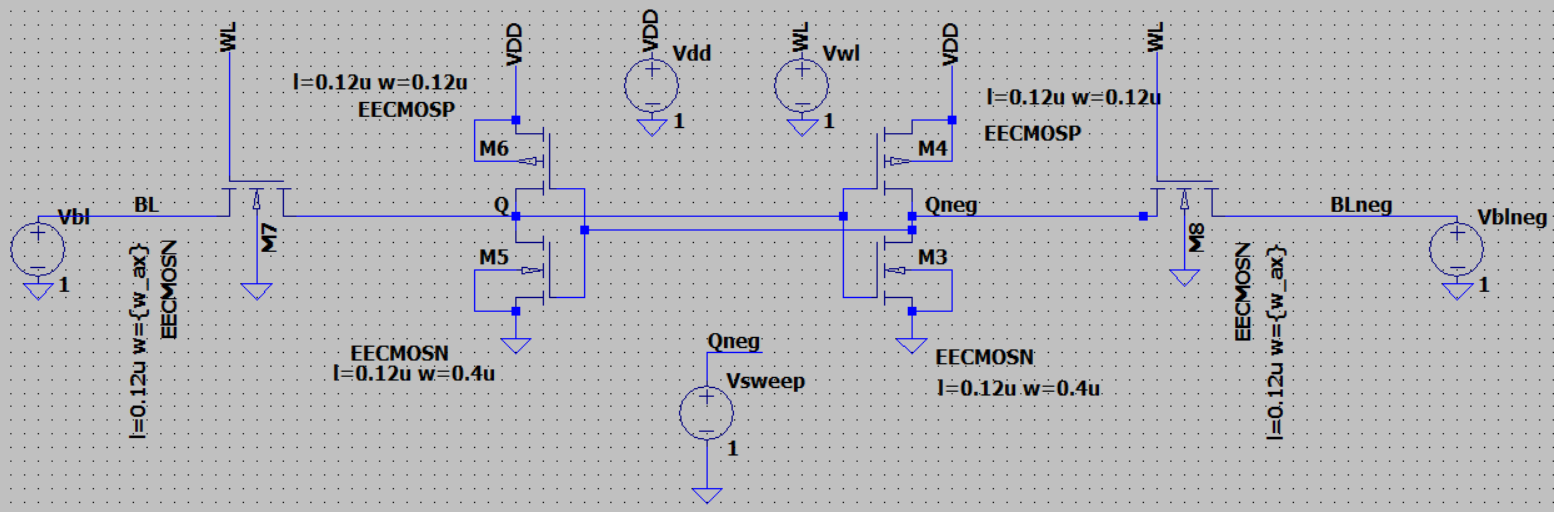

Successful/Total Simulations: 0/1
Raw file: data\snm-standard\read\snm_standard_read_1.raw, Log file: data\snm-standard\read\snm_standard_read_1.log
File opened successfully: data\snm-standard\read\snm_standard_read_1.raw
File updated successfully: ../../images/snm_standard_read_simulation.png


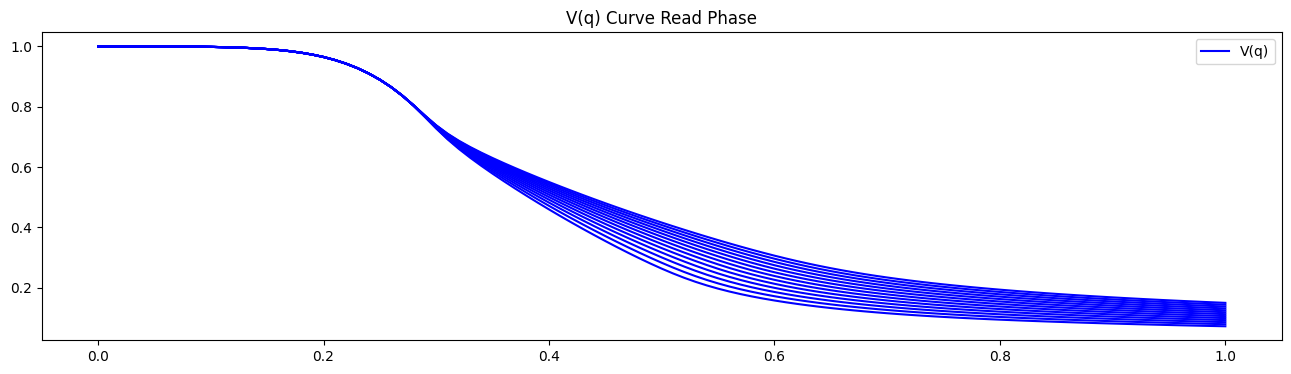

In [5]:
snm_standard_read_netlist = load_asc(
                                     asc_file_path=os.path.join(ltspice, "snm-standard/read/snm_standard_read.asc"),
                                     schematic_image_path=os.path.join(schematics, "snm_standard.png")
                                     )
vwl='1'; vbl='1'; vblneg='1'
snm_standard_read_netlist.set_parameter('l_ax', l_ax_standard)
snm_standard_read_netlist.set_parameter('l_pmos_q', l_pmos_q_standard)
snm_standard_read_netlist.set_parameter('w_pmos_q', w_pmos_q_standard)
snm_standard_read_netlist.set_parameter('l_nmos_q', l_nmos_q_standard)
snm_standard_read_netlist.set_parameter('w_nmos_q', w_nmos_q_standard)
snm_standard_read_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_standard)
snm_standard_read_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_standard)
snm_standard_read_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_standard)
snm_standard_read_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_standard)
snm_standard_read_netlist.set_parameter('vdd', vdd_standard)
snm_standard_read_netlist.set_parameter('vwl', vwl)
snm_standard_read_netlist.set_parameter('vbl', vbl)
snm_standard_read_netlist.set_parameter('vblneg', vblneg)
snm_standard_read_netlist.set_parameter('vsweep', vsweep_standard)
snm_standard_read_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_standard,
                                        w_ax_step_param_standard,
                                        save_w_ax_standard
                                    )
snm_standard_read_runner = SimRunner(output_folder=f"{data}/snm-standard/read/")
snm_standard_read_runner.run(netlist=snm_standard_read_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(snm_standard_read_runner.okSim) + '/' + str(snm_standard_read_runner.runno))

snm_standard_read_raw = ""
snm_standard_read_log = ""
for snm_standard_read_raw, snm_standard_read_log in snm_standard_read_runner:
    print("Raw file: %s, Log file: %s" % (snm_standard_read_raw, snm_standard_read_log))

snm_standard_read_ltr = load_ltr(raw_file_path=snm_standard_read_raw)
v_q_snm_standard_read = snm_standard_read_ltr.get_trace("V(q)")
vsweep_snm_standard_read = snm_standard_read_ltr.get_trace('vsweep')
steps = snm_standard_read_ltr.get_steps()

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_snm_standard_read.get_wave(step), v_q_snm_standard_read.get_wave(step), label=steps[step], color='blue')
plt.title("V(q) Curve Read Phase")
plt.legend(["V(q)"])
snm_standard_read_simulation_path_image = os.path.join(images, "snm_standard_read_simulation.png")
check_output_image(snm_standard_read_simulation_path_image)
plt.savefig(snm_standard_read_simulation_path_image)
plt.show()

w_ax_snm_standard_read = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]
File updated successfully: ../../images/w_ax_snm_standard_read.png


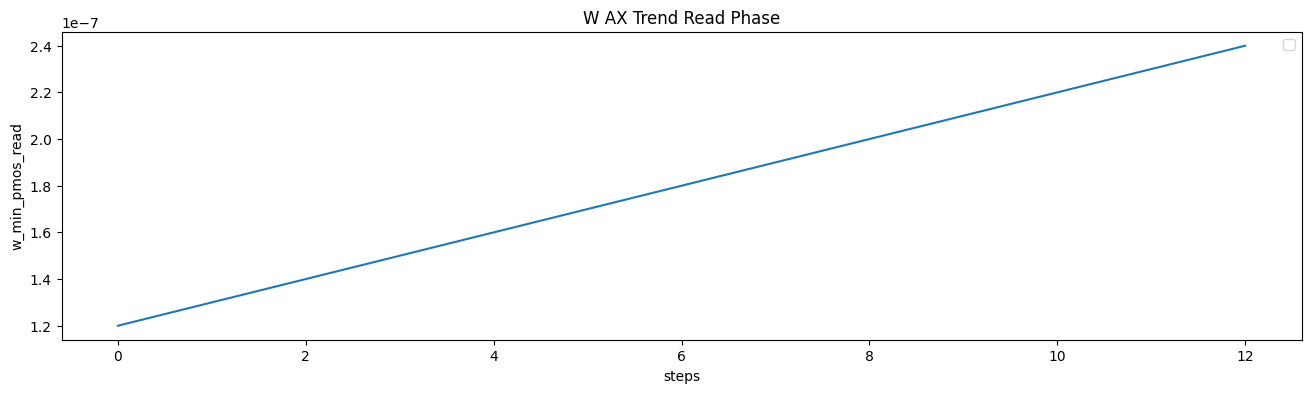

In [6]:
snm_standard_read_log_file_path = f"./{snm_standard_read_log}"

with open(snm_standard_read_log_file_path, "r") as file:
    content = file.read()


w_ax_snm_standard_read_data = re.search(w_ax_snm_standard_pattern, content, re.DOTALL).group(1)
w_ax_snm_standard_read_lines = w_ax_snm_standard_read_data.strip().split('\n')[1:]
w_ax_snm_standard_read = [float(line.split('\t')[1]) for line in w_ax_snm_standard_read_lines]

print(f'w_ax_snm_standard_read = {w_ax_snm_standard_read}')
plt.figure(figsize=(16, 4))
plt.legend(['w_ax_snm_standard_read'])
plt.plot(w_ax_snm_standard_read, label='w_ax_snm_standard_read')
plt.ylabel('w_min_pmos_read'); plt.xlabel('steps'); plt.title('W AX Trend Read Phase')
w_ax_snm_standard_read_path_image = os.path.join(images, "w_ax_snm_standard_read.png")
check_output_image(w_ax_snm_standard_read_path_image)
plt.savefig(w_ax_snm_standard_read_path_image)
plt.show()

File updated successfully: ../../images/butterfly_curve_snm_standard_read.png


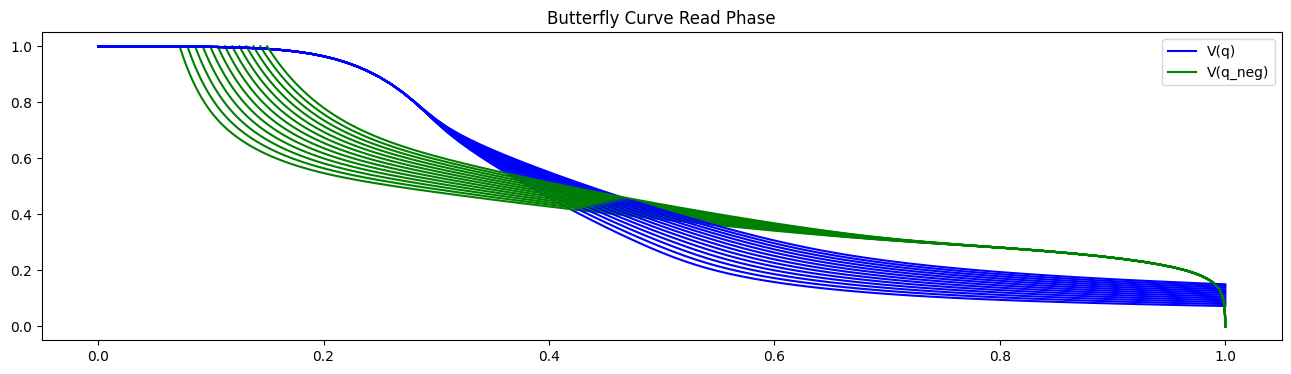

In [7]:
plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_snm_standard_read.get_wave(step), v_q_snm_standard_read.get_wave(step), label=steps[step], color='blue')
    plt.plot(v_q_snm_standard_read.get_wave(step), vsweep_snm_standard_read.get_wave(step), label=steps[step], color='green')
plt.title("Butterfly Curve Read Phase")
plt.legend(["V(q)", "V(q_neg)"])
butterfly_curve_snm_standard_read_path_image = os.path.join(images, "butterfly_curve_snm_standard_read.png")
check_output_image(butterfly_curve_snm_standard_read_path_image)
plt.savefig(butterfly_curve_snm_standard_read_path_image)
plt.show()

<h3>Write Phase SRAM 6T</h3>

In [8]:
'''
snm_standard_write_netlist = load_asc(
                                     asc_file_path=os.path.join(ltspice, "snm-standard/write/snm_standard_write.asc"),
                                     schematic_image_path=os.path.join(schematics, "snm_standard.png")
                                     )
vwl='1'; vbl='1'; vblneg='0'
snm_standard_write_netlist.set_parameter('l_ax', l_ax)
snm_standard_write_netlist.set_parameter('l_pmos_q', l_pmos_q)
snm_standard_write_netlist.set_parameter('w_pmos_q', w_pmos_q)
snm_standard_write_netlist.set_parameter('l_nmos_q', l_nmos_q)
snm_standard_write_netlist.set_parameter('w_nmos_q', w_nmos_q)
snm_standard_write_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg)
snm_standard_write_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg)
snm_standard_write_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg)
snm_standard_write_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg)
snm_standard_write_netlist.set_parameter('vdd', vdd)
snm_standard_write_netlist.set_parameter('vwl', vwl)
snm_standard_write_netlist.set_parameter('vbl', vbl)
snm_standard_write_netlist.set_parameter('vblneg', vblneg)
snm_standard_write_netlist.set_parameter('vsweep', vsweep)
snm_standard_write_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep,
                                        w_ax_step_param,
                                        save_w_ax
                                    )
snm_standard_write_runner = SimRunner(output_folder=f"{data}/snm-standard/write/")
snm_standard_write_runner.run(netlist=snm_standard_write_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(snm_standard_write_runner.okSim) + '/' + str(snm_standard_write_runner.runno))

snm_standard_write_raw = ""
snm_standard_write_log = ""
for snm_standard_write_raw, snm_standard_write_log in snm_standard_write_runner:
    print("Raw file: %s, Log file: %s" % (snm_standard_write_raw, snm_standard_write_log))

snm_standard_write_ltr = load_ltr(raw_file_path=snm_standard_write_raw)
v_q_snm_standard_write = snm_standard_write_ltr.get_trace("V(q)")
vsweep_snm_standard_write = snm_standard_write_ltr.get_trace('vsweep')
steps = snm_standard_write_ltr.get_steps()

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_snm_standard_write.get_wave(step), v_q_snm_standard_write.get_wave(step), label=steps[step], color='blue')
plt.title("V(q) Curve Write Phase")
plt.legend(["V(q)"])
snm_standard_write_simulation_path_image = os.path.join(images, "snm_standard_write_simulation.png")
check_output_image(snm_standard_write_simulation_path_image)
plt.savefig(snm_standard_write_simulation_path_image)
plt.show()
'''

'\nsnm_standard_write_netlist = load_asc(\n                                     asc_file_path=os.path.join(ltspice, "snm-standard/write/snm_standard_write.asc"),\n                                     schematic_image_path=os.path.join(schematics, "snm_standard.png")\n                                     )\nvwl=\'1\'; vbl=\'1\'; vblneg=\'0\'\nsnm_standard_write_netlist.set_parameter(\'l_ax\', l_ax)\nsnm_standard_write_netlist.set_parameter(\'l_pmos_q\', l_pmos_q)\nsnm_standard_write_netlist.set_parameter(\'w_pmos_q\', w_pmos_q)\nsnm_standard_write_netlist.set_parameter(\'l_nmos_q\', l_nmos_q)\nsnm_standard_write_netlist.set_parameter(\'w_nmos_q\', w_nmos_q)\nsnm_standard_write_netlist.set_parameter(\'l_pmos_q_neg\', l_pmos_q_neg)\nsnm_standard_write_netlist.set_parameter(\'w_pmos_q_neg\', w_pmos_q_neg)\nsnm_standard_write_netlist.set_parameter(\'l_nmos_q_neg\', l_nmos_q_neg)\nsnm_standard_write_netlist.set_parameter(\'w_nmos_q_neg\', w_nmos_q_neg)\nsnm_standard_write_netlist.set_paramete

In [9]:
'''
snm_standard_write_log_file_path = f"./{snm_standard_write_log}"

with open(snm_standard_write_log_file_path, "r") as file:
    content = file.read()


w_ax_snm_standard_write_data = re.search(w_ax_snm_standard_pattern, content, re.DOTALL).group(1)
w_ax_snm_standard_write_lines = w_ax_snm_standard_write_data.strip().split('\n')[1:]
w_ax_snm_standard_write = [float(line.split('\t')[1]) for line in w_ax_snm_standard_write_lines]

print(f'w_ax_snm_standard_write = {w_ax_snm_standard_write}')
plt.figure(figsize=(16, 4))
plt.legend(['w_ax_snm_standard_write'])
plt.plot(w_ax_snm_standard_write, label='w_ax_snm_standard_write')
plt.ylabel('w_min_pmos_write'); plt.xlabel('steps'); plt.title('W AX Trend Write Phase')
w_ax_snm_standard_write_path_image = os.path.join(images, "w_ax_snm_standard_write.png")
check_output_image(w_ax_snm_standard_write_path_image)
plt.savefig(w_ax_snm_standard_write_path_image)
plt.show()
'''

'\nsnm_standard_write_log_file_path = f"./{snm_standard_write_log}"\n\nwith open(snm_standard_write_log_file_path, "r") as file:\n    content = file.read()\n\n\nw_ax_snm_standard_write_data = re.search(w_ax_snm_standard_pattern, content, re.DOTALL).group(1)\nw_ax_snm_standard_write_lines = w_ax_snm_standard_write_data.strip().split(\'\n\')[1:]\nw_ax_snm_standard_write = [float(line.split(\'\t\')[1]) for line in w_ax_snm_standard_write_lines]\n\nprint(f\'w_ax_snm_standard_write = {w_ax_snm_standard_write}\')\nplt.figure(figsize=(16, 4))\nplt.legend([\'w_ax_snm_standard_write\'])\nplt.plot(w_ax_snm_standard_write, label=\'w_ax_snm_standard_write\')\nplt.ylabel(\'w_min_pmos_write\'); plt.xlabel(\'steps\'); plt.title(\'W AX Trend Write Phase\')\nw_ax_snm_standard_write_path_image = os.path.join(images, "w_ax_snm_standard_write.png")\ncheck_output_image(w_ax_snm_standard_write_path_image)\nplt.savefig(w_ax_snm_standard_write_path_image)\nplt.show()\n'

In [10]:
'''
plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_snm_standard_write.get_wave(step), v_q_snm_standard_write.get_wave(step), label=steps[step], color='blue')
    plt.plot(v_q_snm_standard_write.get_wave(step), vsweep_snm_standard_write.get_wave(step), label=steps[step], color='green')
plt.title("Butterfly Curve Write Phase")
plt.legend(["V(q)", "V(q_neg)"])
butterfly_curve_snm_standard_write_path_image = os.path.join(images, "butterfly_curve_snm_standard_write.png")
check_output_image(butterfly_curve_snm_standard_write_path_image)
plt.savefig(butterfly_curve_snm_standard_write_path_image)
plt.show()
'''

'\nplt.figure(figsize=(16, 4))\nfor step in range(len(steps)):\n    plt.plot(vsweep_snm_standard_write.get_wave(step), v_q_snm_standard_write.get_wave(step), label=steps[step], color=\'blue\')\n    plt.plot(v_q_snm_standard_write.get_wave(step), vsweep_snm_standard_write.get_wave(step), label=steps[step], color=\'green\')\nplt.title("Butterfly Curve Write Phase")\nplt.legend(["V(q)", "V(q_neg)"])\nbutterfly_curve_snm_standard_write_path_image = os.path.join(images, "butterfly_curve_snm_standard_write.png")\ncheck_output_image(butterfly_curve_snm_standard_write_path_image)\nplt.savefig(butterfly_curve_snm_standard_write_path_image)\nplt.show()\n'

<h3>Alpha Ratio and Beta Ratio</h3>

In [11]:
w_pu = str2float(w_pmos_q_standard)
w_pd = str2float(w_nmos_q_standard)

alpha_ratio = [w_pu / w_ax for w_ax in w_ax_snm_standard_hold]
print(f'alpha_ratio={alpha_ratio}')
beta_ratio = [w_pd / w_ax for w_ax in w_ax_snm_standard_hold]
print(f'beta_ratio={beta_ratio}')

alpha_ratio=[1000000.0, 923076.923076923, 857142.857142857, 800000.0, 750000.0, 705882.3529411765, 666666.6666666666, 631578.947368421, 600000.0, 571428.5714285714, 545454.5454545454, 521739.1304347826, 500000.0]
beta_ratio=[4000000.0, 3692307.692307692, 3428571.428571428, 3200000.0, 3000000.0, 2823529.411764706, 2666666.6666666665, 2526315.789473684, 2400000.0, 2285714.2857142854, 2181818.1818181816, 2086956.5217391304, 2000000.0]


<h2>SNM Seevinck Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/snm-seevinck/hold/snm_seevinck_hold.asc


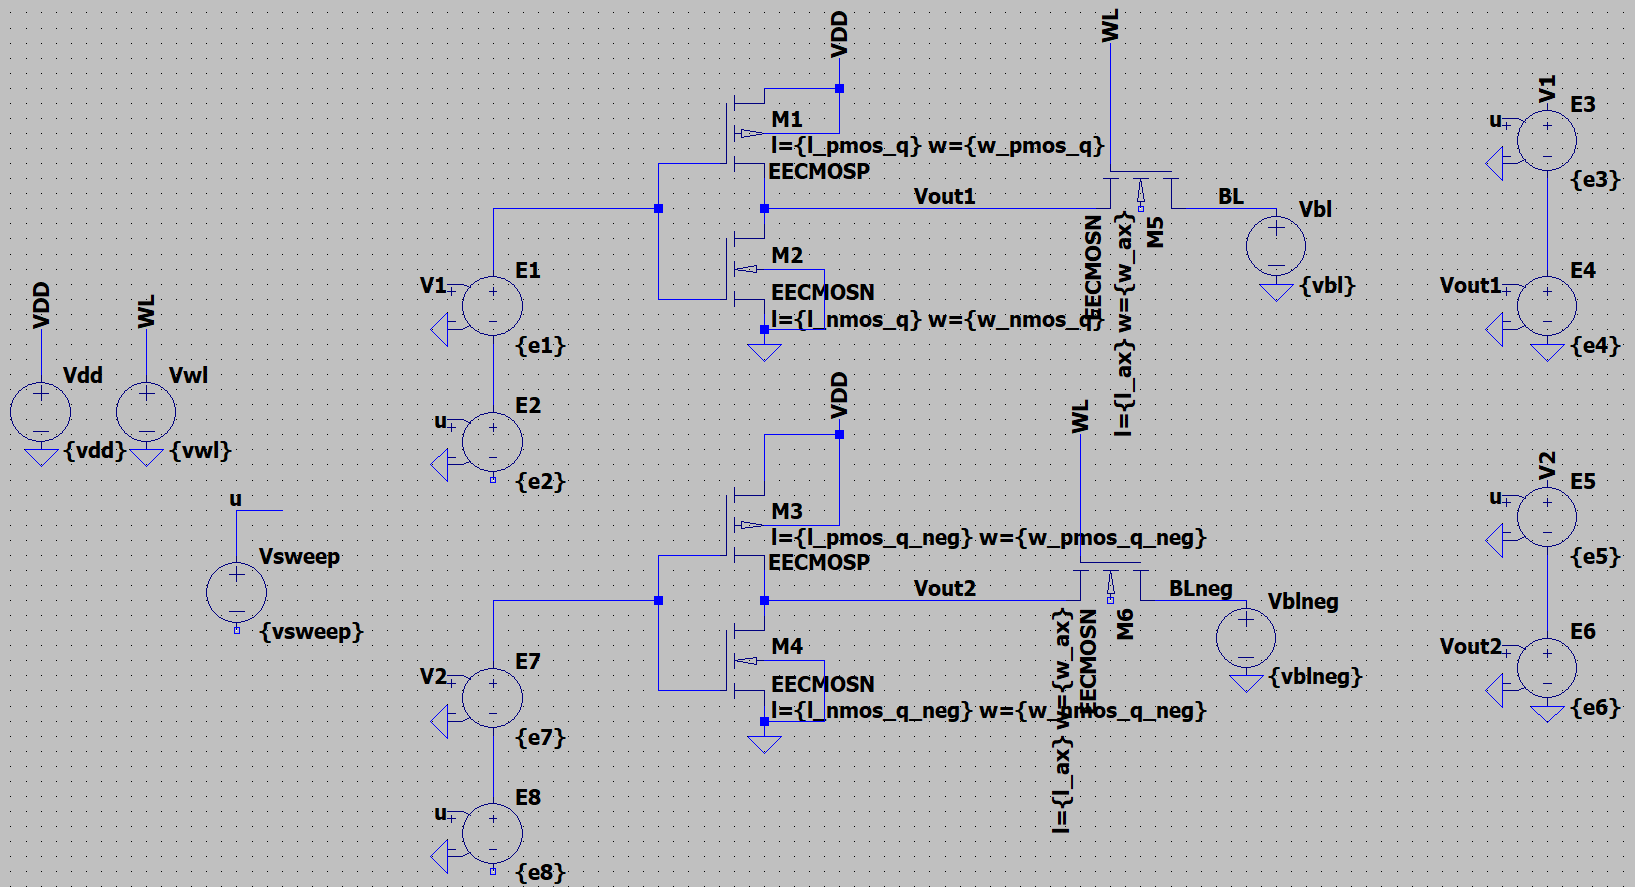

Successful/Total Simulations: 0/1
Raw file: data\snm-seevinck\hold\snm_seevinck_hold_1.raw, Log file: data\snm-seevinck\hold\snm_seevinck_hold_1.log
File opened successfully: data\snm-seevinck\hold\snm_seevinck_hold_1.raw
File updated successfully: ../../images/snm_seevinck_hold_simulation.png


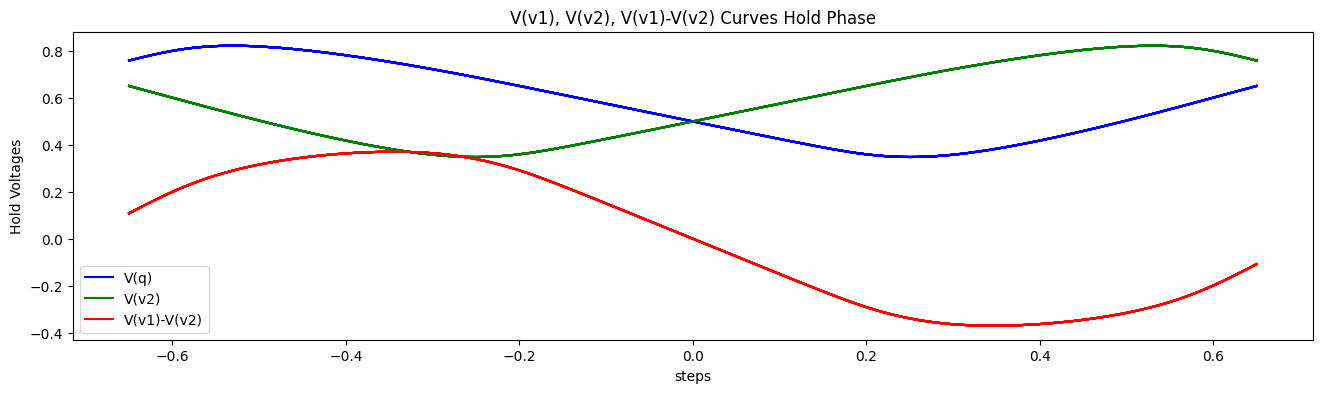

In [12]:
snm_seevinck_hold_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "snm-seevinck/hold/snm_seevinck_hold.asc"),
                                schematic_image_path=os.path.join(schematics, "snm_seevinck.png")
                                )
vwl='0'; vbl='1'; vblneg='1'
snm_seevinck_hold_netlist.set_parameter('l_ax', l_ax_seevinck)
snm_seevinck_hold_netlist.set_parameter('l_pmos_q', l_pmos_q_seevinck)
snm_seevinck_hold_netlist.set_parameter('w_pmos_q', w_pmos_q_seevinck)
snm_seevinck_hold_netlist.set_parameter('l_nmos_q', l_nmos_q_seevinck)
snm_seevinck_hold_netlist.set_parameter('w_nmos_q', w_nmos_q_seevinck)
snm_seevinck_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_seevinck)
snm_seevinck_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_seevinck)
snm_seevinck_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_seevinck)
snm_seevinck_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_seevinck)
snm_seevinck_hold_netlist.set_parameter('vdd', vdd_seevinck)
snm_seevinck_hold_netlist.set_parameter('vwl', vwl)
snm_seevinck_hold_netlist.set_parameter('vbl', vbl)
snm_seevinck_hold_netlist.set_parameter('vblneg', vblneg)
snm_seevinck_hold_netlist.set_parameter('vsweep', vsweep_seevinck)
snm_seevinck_hold_netlist.set_parameter('e1', e1)
snm_seevinck_hold_netlist.set_parameter('e2', e2)
snm_seevinck_hold_netlist.set_parameter('e3', e3)
snm_seevinck_hold_netlist.set_parameter('e4', e4)
snm_seevinck_hold_netlist.set_parameter('e5', e5)
snm_seevinck_hold_netlist.set_parameter('e6', e6)
snm_seevinck_hold_netlist.set_parameter('e7', e7)
snm_seevinck_hold_netlist.set_parameter('e8', e8)
snm_seevinck_hold_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_seevinck,
                                        w_ax_step_param_seevinck,
                                        save_w_ax_seevinck
                                    )
snm_seevinck_hold_runner = SimRunner(output_folder=f"{data}/snm-seevinck/hold/")
snm_seevinck_hold_runner.run(netlist=snm_seevinck_hold_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(snm_seevinck_hold_runner.okSim) + '/' + str(snm_seevinck_hold_runner.runno))

snm_seevinck_hold_raw = ""
snm_seevinck_hold_log = ""
for snm_seevinck_hold_raw, snm_seevinck_hold_log in snm_seevinck_hold_runner:
    print("Raw file: %s, Log file: %s" % (snm_seevinck_hold_raw, snm_seevinck_hold_log))

snm_seevinck_hold_ltr = load_ltr(raw_file_path=snm_seevinck_hold_raw)
v_1_snm_seevinck_hold = snm_seevinck_hold_ltr.get_trace("V(v1)")
v_2_snm_seevinck_hold = snm_seevinck_hold_ltr.get_trace("V(v2)")
vsweep_snm_seevinck_hold = snm_seevinck_hold_ltr.get_trace('vsweep')
steps = snm_seevinck_hold_ltr.get_steps()

plt.figure(figsize=(16, 4))
v1 = []
v2 = []
v1_minus_v2 = []
for step in range(len(steps)):
    v1_curr_value = v_1_snm_seevinck_hold.get_wave(step)
    v1.append(v1_curr_value)
    v2_curr_value = v_2_snm_seevinck_hold.get_wave(step)
    v2.append(v2_curr_value)
    v1_minus_v2_curr_value = v1_curr_value - v2_curr_value
    v1_minus_v2.append(v1_minus_v2_curr_value)
    plt.plot(vsweep_snm_seevinck_hold.get_wave(step), v1_curr_value, label=steps[step], color='blue')
    plt.plot(vsweep_snm_seevinck_hold.get_wave(step), v2_curr_value, label=steps[step], color='green')
    plt.plot(vsweep_snm_seevinck_hold.get_wave(step), v1_minus_v2_curr_value, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Hold Phase")
plt.xlabel("steps"); plt.ylabel("Hold Voltages")
plt.legend(["V(q)", "V(v2)", "V(v1)-V(v2)"])
snm_seevinck_hold_simulation_path_image = os.path.join(images, "snm_seevinck_hold_simulation.png")
check_output_image(snm_seevinck_hold_simulation_path_image)
plt.savefig(snm_seevinck_hold_simulation_path_image)
plt.show()

In [30]:
from properties import w_ax_start_seevinck, w_ax_step_seevinck
w_ax_start_seevinck = float(w_ax_start_seevinck.replace('u', ''))
w_ax_step_seevinck = float(w_ax_step_seevinck.replace('u', ''))
w_ax_seevinck_i_value = 0
print("{:<10} {:<30}".format("w_ax", "SNM(HOLD)"))
for i_array, v1_minus_v2_array in enumerate(v1_minus_v2):
    v1_minus_v2_curr_array = abs(v1_minus_v2_array)
    w_ax_seevinck_curr_value = w_ax_start_seevinck + w_ax_seevinck_i_value
    w_ax_seevinck_i_value = w_ax_seevinck_i_value + w_ax_step_seevinck
    formatted_w_ax_seevinck = "{:.2f}".format(w_ax_seevinck_curr_value)
    print("{:<10} {:<30}".format(f'{formatted_w_ax_seevinck} u', f'{max(v1_minus_v2_curr_array)} mV'))
    

w_ax       SNM(HOLD)                     
0.12 u     0.37036505341529846 mV        
0.13 u     0.37036487460136414 mV        
0.14 u     0.3703647255897522 mV         
0.15 u     0.37036457657814026 mV        
0.16 u     0.37036439776420593 mV        
0.17 u     0.3703642189502716 mV         
0.18 u     0.3703640401363373 mV         
0.19 u     0.37036386132240295 mV        
0.20 u     0.37036368250846863 mV        
0.21 u     0.3703634738922119 mV         
0.22 u     0.3703632950782776 mV         
0.23 u     0.3703630864620209 mV         
0.24 u     0.37036287784576416 mV        


<h3>Read Phase SRAM 6T</h3>